In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fantasy-ipl-prediction-contest/test_data_Captain (1).csv
/kaggle/input/fantasy-ipl-prediction-contest/sample_submission.csv
/kaggle/input/fantasy-ipl-prediction-contest/distribution.csv
/kaggle/input/fantasy-ipl-prediction-contest/train_data_Total_FP.csv
/kaggle/input/fantasy-ipl-prediction-contest/train_data_Captain.csv
/kaggle/input/fantasy-ipl-prediction-contest/test_data_Total_FP (1).csv


In [2]:
data=pd.read_csv('/kaggle/input/fantasy-ipl-prediction-contest/train_data_Total_FP.csv')

In [3]:
data.head()

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Total_FP
0,1,2008,CSK v DC,CSK,DC,"MA Chidambaram Stadium, Chepauk, Chennai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,32.0
1,2,2008,MI v DC,MI,DC,"Dr DY Patil Sports Academy, Mumbai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,32.0,NaN,NaN,0,35,37.0
2,3,2008,DC v CSK,DC,CSK,"Arun Jaitley Stadium, Delhi",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,1.0,0.0,37.0,NaN,0.0,0,79,18.0
3,4,2008,RR v DC,RR,DC,"Sawai Mansingh Stadium, Jaipur",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,2.0,0.0,18.0,NaN,0.0,1,33,36.0
4,5,2008,KKR v DC,KKR,DC,"Eden Gardens, Kolkata",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,0.0,1.0,36.0,NaN,1.0,0,82,13.0


In [4]:
data.shape

(21616, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               21616 non-null  int64  
 1   season                 21616 non-null  int64  
 2   match_name             21616 non-null  object 
 3   home_team              21616 non-null  object 
 4   away_team              21616 non-null  object 
 5   venue                  21616 non-null  object 
 6   batting_innings        21616 non-null  float64
 7   bowling_innings        21616 non-null  float64
 8   Player_name            21616 non-null  object 
 9   Starting_11            21616 non-null  float64
 10  bowling_team_bowl      11716 non-null  object 
 11  batting_team_bat       15154 non-null  object 
 12  prev_runs              14699 non-null  float64
 13  prev_balls             14699 non-null  float64
 14  prev_sixes             14699 non-null  float64
 15  pr

In [6]:

# Handling missing values by filling them with suitable strategies
data['bowling_team_bowl'].fillna('None', inplace=True)
data['batting_team_bat'].fillna('None', inplace=True)
data['prev_runs'].fillna(data['prev_runs'].mean(), inplace=True)
data['prev_balls'].fillna(data['prev_balls'].mean(), inplace=True)
data['prev_sixes'].fillna(0, inplace=True)
data['prev_fours'].fillna(0, inplace=True)
data['prev_wickets'].fillna(0, inplace=True)
data['prev_conceded'].fillna(data['prev_conceded'].mean(), inplace=True)
data['prev_Overs_Bowled'].fillna('0', inplace=True)
data['prev_catches'].fillna(0, inplace=True)
data['prev_Dream Team'].fillna(0, inplace=True)
data['prev_Total_FP'].fillna(data['prev_Total_FP'].mean(), inplace=True)
data['prev_overs'].fillna('0', inplace=True)
data['prev_fielding_heroics'].fillna(0, inplace=True)


/tmp/ipykernel_18/1869193921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bowling_team_bowl'].fillna('None', inplace=True)
/tmp/ipykernel_18/1869193921.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               21616 non-null  int64  
 1   season                 21616 non-null  int64  
 2   match_name             21616 non-null  object 
 3   home_team              21616 non-null  object 
 4   away_team              21616 non-null  object 
 5   venue                  21616 non-null  object 
 6   batting_innings        21616 non-null  float64
 7   bowling_innings        21616 non-null  float64
 8   Player_name            21616 non-null  object 
 9   Starting_11            21616 non-null  float64
 10  bowling_team_bowl      21616 non-null  object 
 11  batting_team_bat       21616 non-null  object 
 12  prev_runs              21616 non-null  float64
 13  prev_balls             21616 non-null  float64
 14  prev_sixes             21616 non-null  float64
 15  pr

In [8]:
data

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Total_FP
0,1,2008,CSK v DC,CSK,DC,"MA Chidambaram Stadium, Chepauk, Chennai",2.0,1.0,AB de Villiers,4.0,...,25.93251,0,0.0,0.0,39.281389,0,0.0,0,98,32.0
1,2,2008,MI v DC,MI,DC,"Dr DY Patil Sports Academy, Mumbai",2.0,1.0,AB de Villiers,4.0,...,25.93251,0,0.0,1.0,32.000000,0,0.0,0,35,37.0
2,3,2008,DC v CSK,DC,CSK,"Arun Jaitley Stadium, Delhi",1.0,2.0,AB de Villiers,4.0,...,25.93251,0,1.0,0.0,37.000000,0,0.0,0,79,18.0
3,4,2008,RR v DC,RR,DC,"Sawai Mansingh Stadium, Jaipur",1.0,2.0,AB de Villiers,4.0,...,25.93251,0,2.0,0.0,18.000000,0,0.0,1,33,36.0
4,5,2008,KKR v DC,KKR,DC,"Eden Gardens, Kolkata",2.0,1.0,AB de Villiers,4.0,...,25.93251,0,0.0,1.0,36.000000,0,1.0,0,82,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21611,22358,2023,PBKS v RR,PBKS,RR,"Himachal Pradesh Cricket Association Stadium, ...",2.0,1.0,substitute_fielder,4.0,...,25.93251,0,0.0,0.0,20.000000,0,0.0,0,3,12.0
21612,22359,2023,MI v SRH,MI,SRH,"Wankhede Stadium, Mumbai",2.0,1.0,substitute_fielder,4.0,...,25.93251,0,0.0,0.0,12.000000,0,0.0,0,80,12.0
21613,22360,2023,RCB v GT,RCB,GT,"M.Chinnaswamy Stadium, Bengaluru",1.0,2.0,substitute_fielder,4.0,...,25.93251,0,0.0,0.0,12.000000,0,0.0,0,4,20.0
21614,22361,2023,CSK v GT,CSK,GT,"MA Chidambaram Stadium, Chepauk, Chennai",1.0,2.0,substitute_fielder,4.0,...,25.93251,0,0.0,0.0,20.000000,0,0.0,0,57,16.0


In [9]:
data.describe()

,match_id,season,batting_innings,bowling_innings,Starting_11,prev_runs,prev_balls,prev_sixes,prev_fours,prev_wickets,prev_conceded,prev_catches,prev_Dream Team,prev_Total_FP,prev_fielding_heroics,prev_duck,luck,Total_FP
count,21616.000000,21616.000000,21616.000000,21616.000000,21616.0,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.00000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000,21616.000000
mean,11196.635918,2015.633975,1.497641,1.502359,4.0,19.622559,15.126267,0.516701,1.208179,0.480616,25.93251,0.316201,0.494310,39.281389,0.085122,0.071521,49.633142,37.617274
std,6452.702186,4.663043,0.500006,0.500006,0.0,17.569602,11.245145,1.163163,2.075347,0.855670,7.73069,0.587941,0.499979,32.669426,0.315486,0.257699,28.865971,31.775817
min,1.000000,2008.000000,1.000000,1.000000,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,-4.000000
25%,5611.750000,2012.000000,1.000000,1.000000,4.0,7.000000,7.000000,0.000000,0.000000,0.000000,25.00000,0.000000,0.000000,13.000000,0.000000,0.000000,25.000000,12.000000
50%,11195.500000,2015.000000,1.000000,2.000000,4.0,19.622559,15.126267,0.000000,0.000000,0.000000,25.93251,0.000000,0.000000,32.000000,0.000000,0.000000,50.000000,30.000000
75%,16783.250000,2020.000000,2.000000,2.000000,4.0,20.000000,16.000000,1.000000,2.000000,1.000000,26.00000,1.000000,1.000000,56.000000,0.000000,0.000000,75.000000,55.000000
max,22362.000000,2023.000000,2.000000,2.000000,4.0,175.000000,73.000000,17.000000,19.000000,6.000000,70.00000,5.000000,1.000000,306.000000,4.000000,1.000000,99.000000,306.000000


In [10]:
'''# Convert categorical variables to numerical using One-Hot Encoding

data = pd.get_dummies(data, columns=['home_team', 'away_team', 'venue', 'Player_name', 'bowling_team_bowl', 'batting_team_bat'])

# Create target variables
X = data.drop(['match_id', 'match_name', 'prev_Total_FP'], axis=1)
y_fp = data['prev_Total_FP']
y_captain = data['captaincy_status']'''


"# Convert categorical variables to numerical using One-Hot Encoding\n\ndata = pd.get_dummies(data, columns=['home_team', 'away_team', 'venue', 'Player_name', 'bowling_team_bowl', 'batting_team_bat'])\n\n# Create target variables\nX = data.drop(['match_id', 'match_name', 'prev_Total_FP'], axis=1)\ny_fp = data['prev_Total_FP']\ny_captain = data['captaincy_status']"

In [11]:
data_prev = data[['match_id', 'season', 'prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours',
               'prev_wickets', 'prev_conceded', 'prev_catches', 
               'prev_Dream Team', 'prev_Total_FP', 'prev_overs', 'prev_fielding_heroics', 
               'prev_duck', 'luck','Total_FP']]

# Display the subset DataFrame
print(data_prev)

       match_id  season  prev_runs  prev_balls  prev_sixes  prev_fours  \
0             1    2008  19.622559   15.126267         0.0         0.0   
1             2    2008  26.000000   21.000000         0.0         2.0   
2             3    2008  21.000000   17.000000         1.0         2.0   
3             4    2008   0.000000    1.000000         0.0         0.0   
4             5    2008  20.000000   22.000000         0.0         0.0   
...         ...     ...        ...         ...         ...         ...   
21611     22358    2023  19.622559   15.126267         0.0         0.0   
21612     22359    2023  19.622559   15.126267         0.0         0.0   
21613     22360    2023  19.622559   15.126267         0.0         0.0   
21614     22361    2023  19.622559   15.126267         0.0         0.0   
21615     22362    2018  19.622559   15.126267         0.0         0.0   

       prev_wickets  prev_conceded  prev_catches  prev_Dream Team  \
0               0.0       25.93251        

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

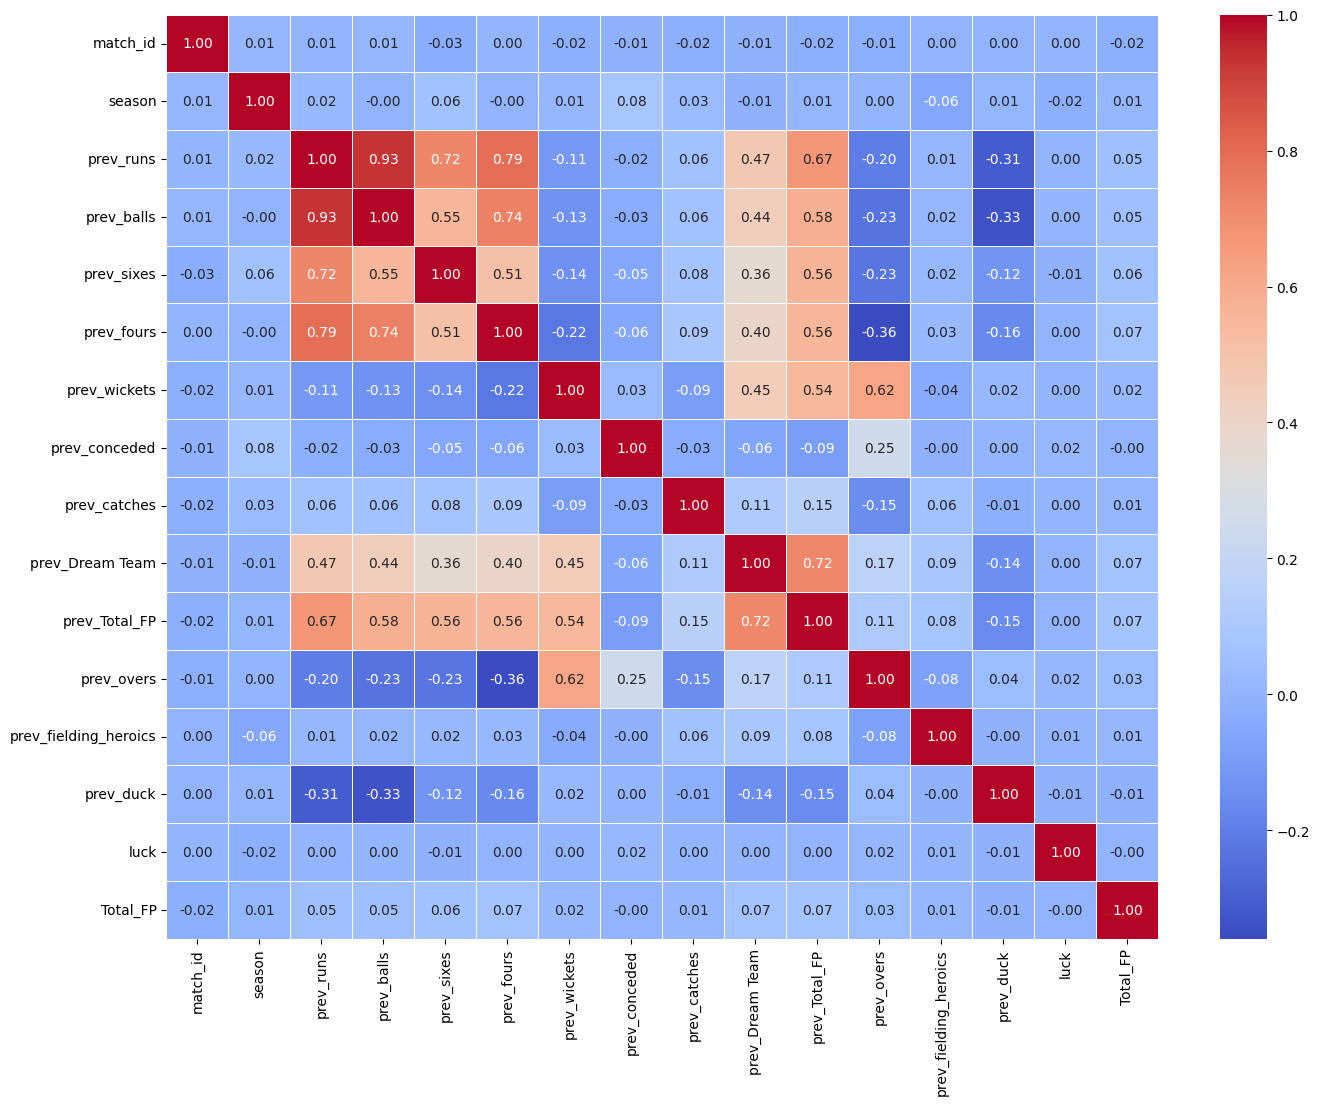

In [13]:
# Compute the correlation matrix
correlation_matrix = data_prev.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Show the plot
plt.show()

In [14]:
''' # Convert categorical variables to numerical using One-Hot Encoding
data = pd.get_dummies(data, columns=['home_team', 'away_team', 'venue', 'Player_name', 'bowling_team_bowl', 'batting_team_bat', 'prev_Overs_Bowled', 'prev_overs'])

# Create target variables
X = data.drop(['match_id', 'match_name', 'total_FP', 'captaincy_status'], axis=1)
y_fp = data['total_FP']
y_captain = data['captaincy_status'] '''


" # Convert categorical variables to numerical using One-Hot Encoding\ndata = pd.get_dummies(data, columns=['home_team', 'away_team', 'venue', 'Player_name', 'bowling_team_bowl', 'batting_team_bat', 'prev_Overs_Bowled', 'prev_overs'])\n\n# Create target variables\nX = data.drop(['match_id', 'match_name', 'total_FP', 'captaincy_status'], axis=1)\ny_fp = data['total_FP']\ny_captain = data['captaincy_status'] "

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
X = data[['prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours', 'prev_wickets','prev_Total_FP']]
Y = data['Total_FP']

In [17]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, Y)

LinearRegression()

In [18]:
data_test=pd.read_csv('/kaggle/input/fantasy-ipl-prediction-contest/test_data_Captain (1).csv')

In [19]:
X_test = data_test[['prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours', 'prev_wickets','prev_Total_FP']]

In [20]:
# Handling missing values by filling them with suitable strategies


X_test['prev_runs'].fillna(X_test['prev_runs'].mean(), inplace=True)
X_test['prev_balls'].fillna(X_test['prev_balls'].mean(), inplace=True)
X_test['prev_sixes'].fillna(0, inplace=True)
X_test['prev_fours'].fillna(0, inplace=True)
X_test['prev_wickets'].fillna(0, inplace=True)
X_test['prev_Total_FP'].fillna(X_test['prev_Total_FP'].mean(), inplace=True)


/tmp/ipykernel_18/3709088057.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['prev_runs'].fillna(X_test['prev_runs'].mean(), inplace=True)
/tmp/ipykernel_18/3709088057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prev_runs'].fillna(X_test['prev_runs'].mean(), inplace=True)
/tmp/ipykernel_18/3709088057.py:5: FutureWarn

In [21]:
X_test=X_test[['prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours', 'prev_wickets','prev_Total_FP']]

In [22]:
Y_pred = model.predict(X_test)

In [23]:
Y_pred

array([33.17325055, 40.21862261, 42.65433522, 39.12803829, 35.89736615,
       33.17325055, 39.0736619 , 38.19629623, 40.50824322, 42.28634249,
       37.59367281, 33.17325055, 35.95540984, 36.22400907, 44.31907486,
       39.70554749, 33.08498271, 35.54338444, 36.45195577, 36.48924221,
       35.0639114 , 35.95540984, 36.22120377, 33.0797934 , 39.54275631,
       36.23577994, 36.01064823, 33.08498271, 39.09960846, 33.09536134,
       41.12005164, 35.89736615, 42.48333568, 43.53638452, 38.45025915,
       41.10967302, 37.40146846, 39.32964022, 36.86874919, 38.42661725,
       38.8013659 , 38.37030491, 41.02310983, 33.17325055, 39.04320916,
       35.1054259 , 37.65915775, 40.83787782, 36.91482997, 39.59561068,
       40.97163112, 33.09536134, 37.4608947 , 33.07460409, 35.1054259 ,
       33.07460409, 42.90805565, 46.46397846, 33.17325055, 38.78283112,
       35.06910071, 43.1128255 , 39.07336295, 35.06910071, 35.10023659,
       40.75545249, 33.17325055, 35.0639114 , 37.17082811, 40.43

In [24]:
cap_data=pd.read_csv('/kaggle/input/fantasy-ipl-prediction-contest/train_data_Captain.csv')

In [25]:
cap_data.head()

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck,Captain/Vice Captain
0,1,2008,CSK v DC,CSK,DC,"MA Chidambaram Stadium, Chepauk, Chennai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,98,NC
1,2,2008,MI v DC,MI,DC,"Dr DY Patil Sports Academy, Mumbai",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,NaN,1.0,32.0,NaN,NaN,0,35,NC
2,3,2008,DC v CSK,DC,CSK,"Arun Jaitley Stadium, Delhi",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,1.0,0.0,37.0,NaN,0.0,0,79,NC
3,4,2008,RR v DC,RR,DC,"Sawai Mansingh Stadium, Jaipur",1.0,2.0,AB de Villiers,4.0,...,NaN,NaN,2.0,0.0,18.0,NaN,0.0,1,33,NC
4,5,2008,KKR v DC,KKR,DC,"Eden Gardens, Kolkata",2.0,1.0,AB de Villiers,4.0,...,NaN,NaN,0.0,1.0,36.0,NaN,1.0,0,82,NC


In [26]:
cap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21616 entries, 0 to 21615
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               21616 non-null  int64  
 1   season                 21616 non-null  int64  
 2   match_name             21616 non-null  object 
 3   home_team              21616 non-null  object 
 4   away_team              21616 non-null  object 
 5   venue                  21616 non-null  object 
 6   batting_innings        21616 non-null  float64
 7   bowling_innings        21616 non-null  float64
 8   Player_name            21616 non-null  object 
 9   Starting_11            21616 non-null  float64
 10  bowling_team_bowl      11716 non-null  object 
 11  batting_team_bat       15154 non-null  object 
 12  prev_runs              14699 non-null  float64
 13  prev_balls             14699 non-null  float64
 14  prev_sixes             14699 non-null  float64
 15  pr

In [27]:
cap_data['prev_runs'].fillna(data['prev_runs'].mean(), inplace=True)
cap_data['prev_balls'].fillna(data['prev_balls'].mean(), inplace=True)
cap_data['prev_sixes'].fillna(data['prev_sixes'].mean(), inplace=True)
cap_data['prev_fours'].fillna(data['prev_fours'].mean(), inplace=True)
cap_data['prev_wickets'].fillna(data['prev_wickets'].mean(), inplace=True)
cap_data['prev_Total_FP'].fillna(data['prev_Total_FP'].mean(), inplace=True)


/tmp/ipykernel_18/3801981185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cap_data['prev_runs'].fillna(data['prev_runs'].mean(), inplace=True)
/tmp/ipykernel_18/3801981185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable 'Captain/Vice Captain' column
cap_data['Captain/Vice Captain'] = label_encoder.fit_transform(cap_data['Captain/Vice Captain'])

# Check the encoded values
print(cap_data['Captain/Vice Captain'].value_counts())

# Now 'Captain/Vice Captain' column is encoded with numerical values


Captain/Vice Captain
1    19981
2      827
0      808
Name: count, dtype: int64


In [29]:
cap_data['Captain/Vice Captain']

0        1
1        1
2        1
3        1
4        1
        ..
21611    1
21612    1
21613    1
21614    1
21615    1
Name: Captain/Vice Captain, Length: 21616, dtype: int64

In [30]:
Xcap=cap_data[['prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours', 'prev_wickets','prev_Total_FP']]
Ycap=cap_data['Captain/Vice Captain']

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [32]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(Xcap, Ycap)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
cap_data_test=pd.read_csv('/kaggle/input/fantasy-ipl-prediction-contest/test_data_Captain (1).csv')

In [34]:
cap_data_test.head()

,match_id,season,match_name,home_team,away_team,venue,batting_innings,bowling_innings,Player_name,Starting_11,...,prev_wickets,prev_conceded,prev_Overs_Bowled,prev_catches,prev_Dream Team,prev_Total_FP,prev_overs,prev_fielding_heroics,prev_duck,luck
0,8486,2009,RCB v RR,RCB,RR,"Newlands, Cape Town",2.0,1.0,Kamran Khan,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,96
1,21272,2022,RCB v GT,RCB,GT,"Wankhede Stadium, Mumbai",2.0,1.0,Wanindu Hasaranga de Silva,4.0,...,2.0,15.0,"[7, 9, 11, 17]",1.0,1.0,69.0,4.0,0.0,0,40
2,16353,2023,LSG v DC,LSG,DC,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,2.0,1.0,Rovman Powell,4.0,...,NaN,NaN,NaN,NaN,1.0,60.0,NaN,NaN,0,51
3,13436,2017,RCB v DC,RCB,DC,"M.Chinnaswamy Stadium, Bengaluru",1.0,2.0,Pawan Negi,4.0,...,1.0,19.0,"[7, 9, 15]",NaN,1.0,33.0,3.0,NaN,0,41
4,1323,2023,RCB v CSK,RCB,CSK,"M.Chinnaswamy Stadium, Bengaluru",1.0,2.0,Ambati Rayudu,4.0,...,NaN,NaN,NaN,NaN,0.0,5.0,NaN,NaN,0,88


In [35]:
cap_data_test['match_id'].shape

(709,)

In [36]:
cap_data_test['prev_runs'].fillna(data['prev_runs'].mean(), inplace=True)
cap_data_test['prev_balls'].fillna(data['prev_balls'].mean(), inplace=True)
cap_data_test['prev_sixes'].fillna(data['prev_sixes'].mean(), inplace=True)
cap_data_test['prev_fours'].fillna(data['prev_fours'].mean(), inplace=True)
cap_data_test['prev_wickets'].fillna(data['prev_wickets'].mean(), inplace=True)
cap_data_test['prev_Total_FP'].fillna(data['prev_Total_FP'].mean(), inplace=True)

/tmp/ipykernel_18/342766308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cap_data_test['prev_runs'].fillna(data['prev_runs'].mean(), inplace=True)
/tmp/ipykernel_18/342766308.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [37]:
Xcap_test=cap_data_test[['prev_runs', 'prev_balls', 'prev_sixes', 'prev_fours', 'prev_wickets','prev_Total_FP']]

In [38]:
# Make predictions on the test set
Ycap_pred = logistic_reg_model.predict(Xcap_test)

In [39]:
Ycap_pred_labels = label_encoder.inverse_transform(Ycap_pred)
Ycap_pred_labels


array(['NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC',
       'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'NC', 'N

In [40]:
Ycap_pred_labels.shape

(709,)

In [41]:
Y_pred.shape

(709,)

In [42]:
data['match_id'].shape

(21616,)

In [43]:
submission = pd.DataFrame({'match_id':cap_data_test['match_id'], 'Total_FP':Y_pred, 'Captain/Vice Captain':Ycap_pred_labels})
submission = submission[['match_id', 'Total_FP', 'Captain/Vice Captain']]
submission.head()

,match_id,Total_FP,Captain/Vice Captain
0,8486,33.173251,NC
1,21272,40.218623,NC
2,16353,42.654335,NC
3,13436,39.128038,NC
4,1323,35.897366,NC


In [44]:
submission.to_csv('/kaggle/working/submission.csv', index=False)

In [45]:
import os
if os.path.exists('submission.csv'):
    print("Submission CSV file has been created successfully.")
else:
    print("Error: Submission CSV file was not created.")

Submission CSV file has been created successfully.
